In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

import scipy.stats as st
import statsmodels.api as sm
import pylab as py

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import random

In [3]:
random.seed(100)

In [4]:
import shap

C:\Users\ajhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [6]:
dataset = pd.read_excel(r"C:\Users\ajhay\OneDrive\Documents\DTSC2302\Project final\Final Project 2302 Data - group 13.xlsx",na_values=['--'])
dataset.dropna(inplace=True)

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
dataset.head()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022
0,2,33.0,0.766,0.955,504,0.940,0.387,21,1129,1.0,1121,651
1,3,31.0,0.916,0.976,1613,0.864,0.389,25,8510,2.0,6605,7502
2,4,44.0,0.919,0.980,364,0.897,1.000,13,353,1.0,162,172
3,5,31.0,0.639,0.847,189,0.940,0.232,36,336,1.0,346,346
4,6,36.0,0.598,1.000,675,0.880,0.315,37,811,1.0,789,811


In [9]:
dtree_9 = DecisionTreeClassifier(max_depth=9, random_state=100)
log_reg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

In [10]:
scaler = StandardScaler()

In [11]:
x = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
#y = dataset['median_age_of_residents_2022']


In [12]:
dataset['median_age_of_residents_2022_binary'] = (dataset['median_age_of_residents_2022'] > 35).astype(int)
y = dataset['median_age_of_residents_2022_binary']

dataset.head()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022,median_age_of_residents_2022_binary
0,2,33.0,0.766,0.955,504,0.940,0.387,21,1129,1.0,1121,651,0
1,3,31.0,0.916,0.976,1613,0.864,0.389,25,8510,2.0,6605,7502,0
2,4,44.0,0.919,0.980,364,0.897,1.000,13,353,1.0,162,172,1
3,5,31.0,0.639,0.847,189,0.940,0.232,36,336,1.0,346,346,0
4,6,36.0,0.598,1.000,675,0.880,0.315,37,811,1.0,789,811,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**logisitic**

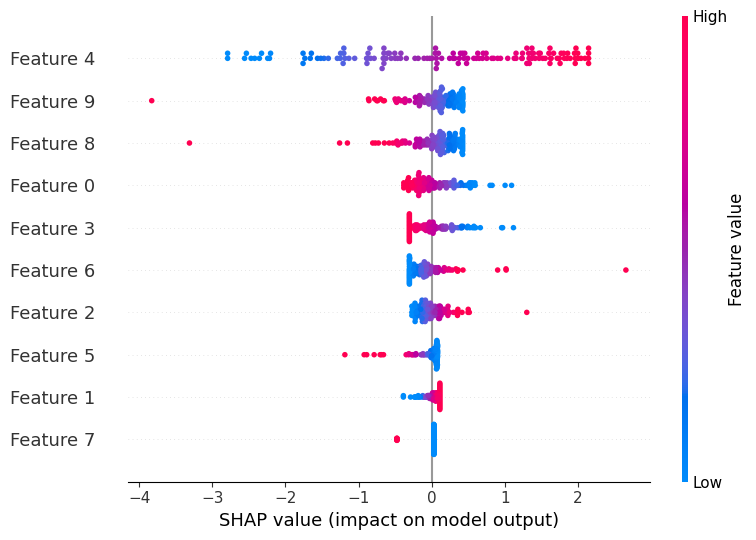

In [14]:
# shap for logistic

log_reg.fit(X_train_scaled, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(log_reg, X_train_scaled)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Plot the SHAP summary plot (global explanation of the model)
shap.summary_plot(shap_values, X_test_scaled)

**Svm lin**

.values =
array([[-1.81624000e-01,  5.98223093e-02, -8.58012989e-02, ...,
        -2.04279586e-01, -4.20371001e-02, -1.14576493e+00],
       [-1.12780091e-01,  3.84741418e-02,  1.13811955e-01, ...,
         1.30391225e-02,  2.94473387e-02,  4.34069152e-01],
       [ 9.76206626e-03,  5.98223093e-02, -2.68780584e-03, ...,
         1.30391225e-02,  1.03218571e-02,  8.34758358e-02],
       ...,
       [ 3.27820925e-01,  2.78000581e-02, -4.35402007e-02, ...,
         1.30391225e-02, -2.15539455e-02, -3.13863256e-01],
       [-8.93731623e-02,  3.72881325e-02,  3.73193671e-02, ...,
         1.30391225e-02,  5.82028544e-04,  1.07601850e-02],
       [-2.00900294e-01,  4.67762070e-02,  5.81681755e-02, ...,
         1.30391225e-02,  3.31661823e-02,  4.37531802e-01]])

.base_values =
array([0.13729307, 0.13729307, 0.13729307, 0.13729307, 0.13729307,
       0.13729307, 0.13729307, 0.13729307, 0.13729307, 0.13729307,
       0.13729307, 0.13729307, 0.13729307, 0.13729307, 0.13729307,
       0.1372930

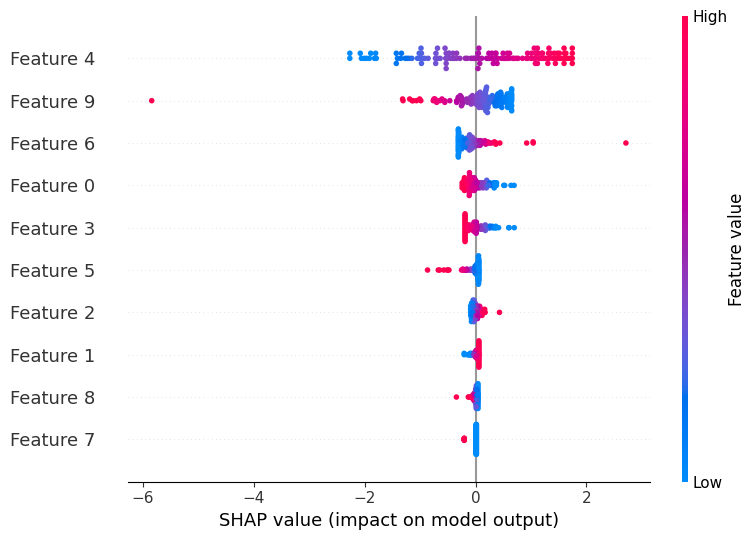

In [15]:
svm_lin.fit(X_train_scaled, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(svm_lin, X_train_scaled)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)
print(shap_values)
# Plot the SHAP summary plot (global explanation of the model)
shap.summary_plot(shap_values, X_test_scaled)

**lda**

.values =
array([[-2.80876526e-01,  1.22181533e-01, -1.13866772e-02, ...,
        -1.77906667e-01, -3.73802621e-01, -5.05872092e-01],
       [-1.74411312e-01,  7.85798759e-02,  1.51039671e-02, ...,
         1.13557447e-02,  2.61851849e-01,  1.91647924e-01],
       [ 1.50967672e-02,  1.22181533e-01, -3.56698301e-04, ...,
         1.13557447e-02,  9.17840963e-02,  3.68558110e-02],
       ...,
       [ 5.06966053e-01,  5.67790472e-02, -5.77821336e-03, ...,
         1.13557447e-02, -1.91662158e-01, -1.38575251e-01],
       [-1.38213140e-01,  7.61575616e-02,  4.95264748e-03, ...,
         1.13557447e-02,  5.17551864e-03,  4.75078016e-03],
       [-3.10686786e-01,  9.55360760e-02,  7.71948965e-03, ...,
         1.13557447e-02,  2.94920578e-01,  1.93176735e-01]])

.base_values =
array([0.12324044, 0.12324044, 0.12324044, 0.12324044, 0.12324044,
       0.12324044, 0.12324044, 0.12324044, 0.12324044, 0.12324044,
       0.12324044, 0.12324044, 0.12324044, 0.12324044, 0.12324044,
       0.1232404

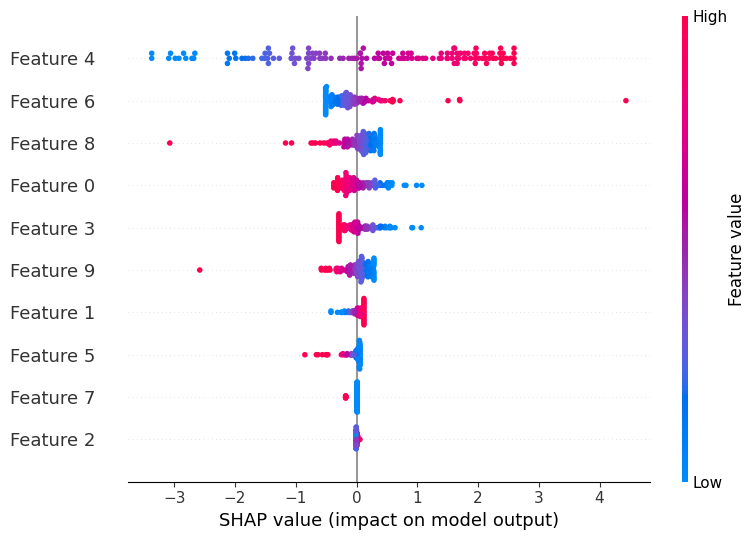

In [16]:
lda.fit(X_train_scaled, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(lda, X_train_scaled)

# Get SHAP values for the test set
shap_values = explainer(X_test_scaled)
print(shap_values)
# Plot the SHAP summary plot (global explanation of the model)
shap.summary_plot(shap_values, X_test_scaled)

## Accuracy

features from 0 - 9

0 = high spped internet

1 = employment

2 = single family housing

3 = residential occupancy

4 = home ownership 

5 = vacant land in acres

6 = proximity to public transportation

7 = street connectivity index

8 = proximity to school age care

9 = proximity to early care and education

In [17]:
dtree_9 = DecisionTreeClassifier(max_depth=9, random_state=100)
log_reg = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

logisitic

In [18]:
log_x = dataset[['home_ownership_2022','high_speed_internet_access_2022']]

In [19]:
log_reg.fit(X_train_scaled, y_train)


accuracy = cross_val_score(log_reg, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 72.26%


In [20]:
log_reg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(log_x, y, test_size=0.3, random_state=100)

# Standardize the dataset for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)


accuracy = cross_val_score(log_reg, X_test_scaled, y_test, cv = 8)
print(f"LDA cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

LDA cross-validation accuracy: 76.72%


lda

In [21]:
lda.fit(X_train_scaled, y_train)


accuracy = cross_val_score(lda, X_test_scaled, y_test, cv = 8)
print(f"logisitic cross-validation accuracy: {accuracy.mean() * 100:.2f}%")

logisitic cross-validation accuracy: 76.72%
